In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pickle as pkl

In [3]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 262.6 kB/s eta 0:00:35
     ---------------------------------------- 0.0/9.2 MB 245.8 kB/s eta 0:00:38
     ---------------------------------------- 0.1/9.2 MB 328.2 kB/s eta 0:00:28
      --------------------------------------- 0.2/9.2 MB 701.4 kB/s eta 0:00:13
     - -------------------------------------- 0.3/9.2 MB 1.0 MB/s eta 0:00:09
     -- ------------------------------------- 0.5/9.2 MB 1.6 MB/s eta 0:00:06
     --- ------------------------------------ 0.7/9.2 MB 1.9 MB/s eta 0:00:05
     ---- ----------------------------------- 1.0/9.2 MB 2.3 MB/s eta 0:00:04
     ----- ---------------------------------- 1.2/9.2 MB 2.7 MB/s eta 0:00:03
     ------ --------------------------------- 1.5/9.2 MB 3.0 MB/s eta 0:00:03

## Simple Linear regression example

In [75]:
num_points = 30
x_vals = np.linspace(0,10, num_points)
a, b = 10,2
y_vals = a+b*x_vals + 2*np.random.rand(num_points)

In [76]:
x_vals1 = sm.add_constant(x_vals)
x_vals1[:3,:]

array([[1.        , 0.        ],
       [1.        , 0.34482759],
       [1.        , 0.68965517]])

### Using Statmodels

In [77]:
# Assuming X_train and y_train are your training data
x_vals1 = sm.add_constant(x_vals)  # Add a constant (intercept) term to the features
## If we don't add it, the intercept will be 0.
# Create a linear regression model
model = sm.OLS(y_vals, x_vals1)
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2874.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           9.10e-30
Time:                        11:41:52   Log-Likelihood:                -26.819
No. Observations:                  30   AIC:                             57.64
Df Residuals:                      28   BIC:                             60.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8583      0.218     49.782      0.0

## Plotting the graph

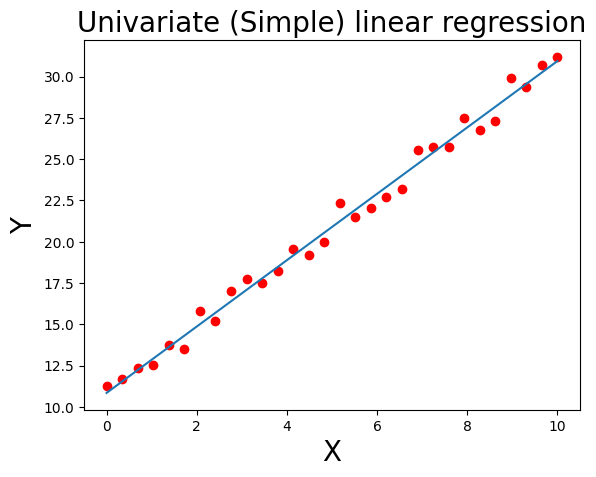

In [78]:
plt.figure()
plt.scatter(x_vals, y_vals, color = 'r')
plt.plot(x_vals, results.predict(x_vals1))
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

The univariate linear regression equation is:
$$ \hat{Y_i} = b_0 + b_1 x_i $$


In [79]:
X = x_vals
Y = y_vals

# Calculate means
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Calculate the slope (beta1)
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X) ** 2)
beta1 = numerator / denominator

# Calculate the intercept (beta0)
beta0 = mean_Y - beta1 * mean_X

print("Slope (beta1):", beta1)
print("Intercept (beta0):", beta0)

Slope (beta1): 2.008079446181512
Intercept (beta0): 10.858274314564664


### How do I know if my model in any good?


In [80]:
num_points = 10
x_vals = np.linspace(0,10, num_points)
a, b = 10,2
y_vals = a+b*x_vals + 5*np.random.rand(num_points)

# Assuming X_train and y_train are your training data
x_vals1 = sm.add_constant(x_vals)  # Add a constant (intercept) term to the features
## If we don't add it, the intercept will be 0.
# Create a linear regression model
model = sm.OLS(y_vals, x_vals1)
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     90.83
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.21e-05
Time:                        12:50:55   Log-Likelihood:                -19.443
No. Observations:                  10   AIC:                             42.89
Df Residuals:                       8   BIC:                             43.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8160      1.111     12.432      0.0

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


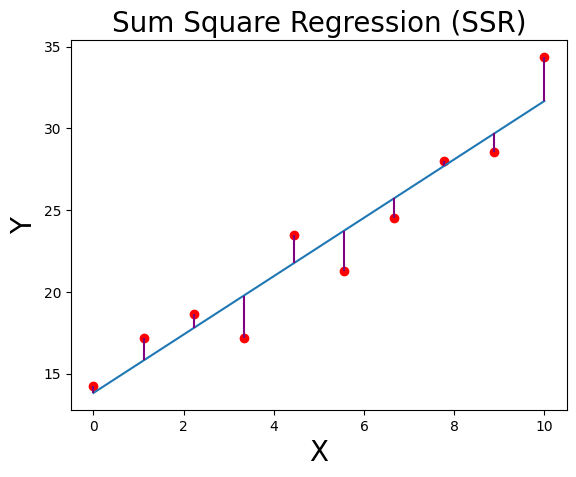

In [87]:
plt.figure()
plt.scatter(x_vals, y_vals, color = 'r')
plt.plot(x_vals, results.predict(x_vals1))

# single line
plt.vlines(x = x_vals, ymin = y_vals, ymax = results.predict(x_vals1),
           colors = 'purple',
           label = 'vline_multiple - full height')

plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Sum Square Regression (SSR)', fontsize = 20)
plt.show()

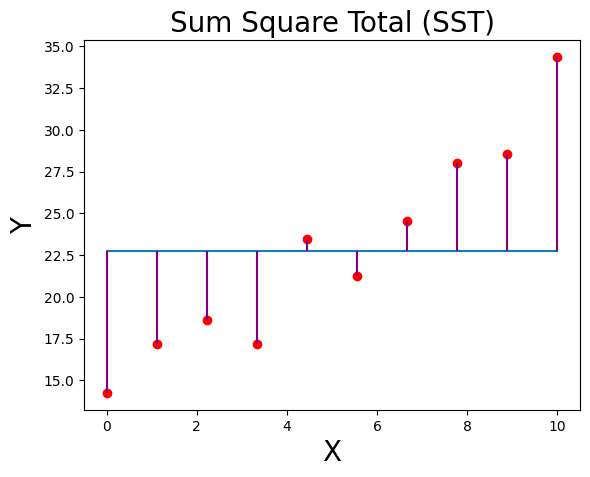

In [86]:
plt.figure()
plt.scatter(x_vals, y_vals, color = 'r')
plt.plot(x_vals, np.ones(y_vals.shape[0])*y_vals.mean())

# single line
plt.vlines(x = x_vals, ymin = y_vals, ymax = np.ones(y_vals.shape[0])*y_vals.mean(),
           colors = 'purple',
           label = 'vline_multiple - full height')

plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Sum Square Total (SST)', fontsize = 20)
plt.show()

In [ ]:
plt.figure()
plt.scatter(x_vals, y_vals, color = 'r')
plt.plot(x_vals, np.ones(y_vals.shape[0])*y_vals.mean())

# single line
plt.vlines(x = x_vals, ymin = y_vals, ymax = np.ones(y_vals.shape[0])*y_vals.mean(),
           colors = 'purple',
           label = 'vline_multiple - full height')

plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Sum Square Total (SST)', fontsize = 20)
plt.show()

Suppose we have more than 1 variable we wish to use to predict $Y$. Say we have $n$ variables.
Let $x_{i,j}$ be the $i^{th}$ sample and the $j^{th}$ variable.  

The multivariate linear regression equation is:
The univariate linear regression equation is:
$$ \hat{Y_i} = \alpha + \beta_1 x_{i,1}+ \beta_2 x_{i,2} ...+ \beta_n x_{i,n}$$
 

In [61]:
## The path to the file
path = r'C:\Users\user\Downloads\230904 SAFETY COURSE MATIRIALS\10 LECTURES\LEC 01 INTRO to Safety\35 DATA 23A'
file_name = 'oring.csv'

## Challenger disaster data

In [42]:
## Extracting the data from the csv file into pandas
data = pd.read_csv(os.path.join(path, file_name))
data.head()

,num_failure,temp
0,0,66
1,1,70
2,0,69
3,0,68
4,0,67


Lets look first at the data

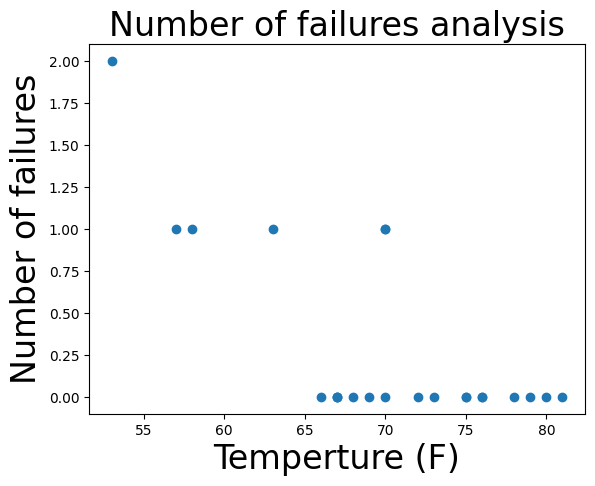

In [45]:
## Preseting the data
plt.figure()
plt.scatter(data['temp'], data['num_failure'])
plt.title('Number of failures analysis', fontsize = 24)
plt.xlabel('Temperture (F)', fontsize = 24)
plt.ylabel('Number of failures', fontsize = 24)
plt.savefig('../figs/num_failures_with_0.png')
plt.show()

We next perform linear regression,  where we try to predict number of failures as a funtion of the outside temprature during the launch

In [46]:
# Assuming X_train and y_train are your training data
X_train = sm.add_constant(data.loc[:,'temp'])  # Add a constant (intercept) term to the features
## If we don't add it, the intercept will be 0.

# Create a linear regression model
model = sm.OLS(data['num_failure'], X_train)
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            num_failure   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     23.53
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           8.53e-05
Time:                        11:59:18   Log-Likelihood:                -10.095
No. Observations:                  23   AIC:                             24.19
Df Residuals:                      21   BIC:                             26.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1543      0.798      5.207      0.0

If we want to know if the temparture is statistically significant.

In [50]:
## Creating X values we wish to predict
X_pred = sm.add_constant(np.linspace(x_lb,x_ub, 100))
X_pred[:3,:3]

array([[ 1.        , 30.        ],
       [ 1.        , 30.90909091],
       [ 1.        , 31.81818182]])

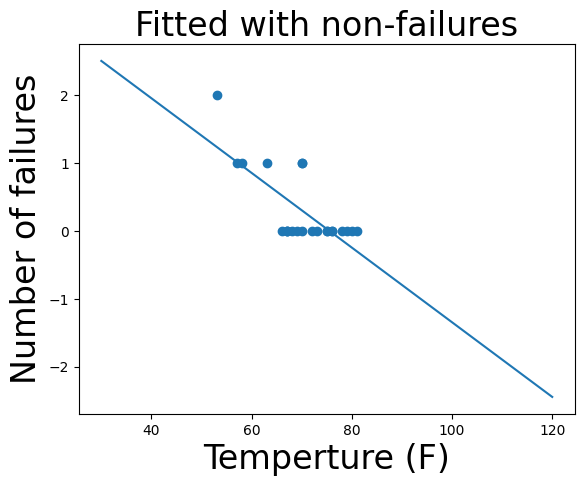

In [53]:
x_lb = 30
x_ub = 120
plt.figure()
plt.plot(X_pred[:,1], results.predict(X_pred))
plt.scatter(data['temp'], data['num_failure'])
plt.title('Fitted with non-failures', fontsize = 24)
plt.xlabel('Temperture (F)', fontsize = 24)
plt.ylabel('Number of failures', fontsize = 24)
plt.savefig('../figs/num_failures_with_0_fitted.png')
plt.show()

## Filtered data of NASA
That is, without 0 values

In [49]:
# filtering the zeros
data.loc[data['num_failure']>0,'num_failure']

1     1
8     1
9     1
10    1
13    2
22    1
Name: num_failure, dtype: int64

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:            num_failure   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     2.383
Date:                Thu, 14 Sep 2023   Prob (F-statistic):              0.198
Time:                        12:08:11   Log-Likelihood:                -1.1896
No. Observations:                   6   AIC:                             6.379
Df Residuals:                       4   BIC:                             5.963
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3442      1.418      2.358      0.0

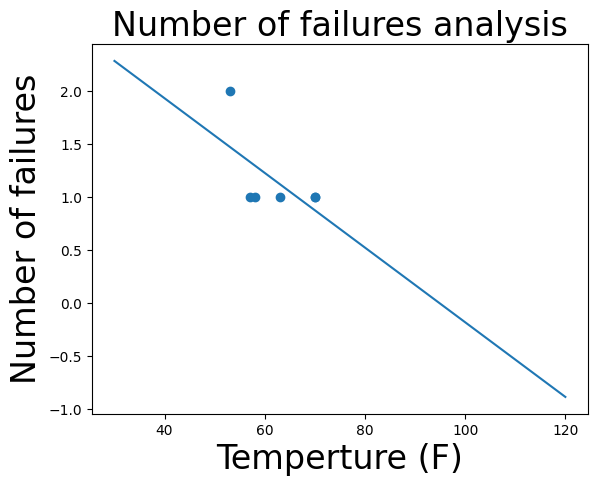

In [60]:
## Filtering the data
X_train_filtered = data.loc[data['num_failure']>0,'temp']

X_train_filtered = sm.add_constant(X_train_filtered) 

# Create a linear regression model
model = sm.OLS(data.loc[data['num_failure']>0,'num_failure'], X_train_filtered)

# Fit the model
results = model.fit()

# Print summary statistics, including p-values for each coefficient
print(results.summary())

x_lb = 30
x_ub = 120
plt.figure()
X_pred = sm.add_constant(np.linspace(x_lb,x_ub, 100))

plt.plot(np.linspace(x_lb,x_ub, 100), results.predict(X_pred))
plt.scatter(data.loc[data['num_failure']>0,'temp'], data.loc[data['num_failure']>0,'num_failure'])
plt.title('Number of failures analysis', fontsize = 24)
plt.xlabel('Temperture (F)', fontsize = 24)
plt.ylabel('Number of failures', fontsize = 24)
plt.savefig('../figs/num_failures_without_0_fitted.png')
plt.show()

# Logistic regression

Logistic regression gets 0 and 1 values. For this purpose we need to convert this data from count data to binary data

In [113]:
data_for_logistic2 = pd.DataFrame(data)
data_for_logistic2.head()

,num_failure,temp
0,0,66
1,1,70
2,0,69
3,0,68
4,0,67


In [114]:
data_for_logistic2['num_failure'] = data_for_logistic2['num_failure'].apply(lambda x: 1 if x >= 1 else x)
data_for_logistic2.head()

,num_failure,temp
0,0,66
1,1,70
2,0,69
3,0,68
4,0,67


In [49]:
data_for_logistic = pd.DataFrame([])
for ind in range(data.shape[0]):
    num_failure = data.loc[ind, 'num_failure']
    num_not_failure = 6 - num_failure
    for ind1 in range(num_failure):
        curr_ind  = data_for_logistic.shape[0]
        data_for_logistic.loc[curr_ind, 'failure'] = 1
        data_for_logistic.loc[curr_ind, 'temp'] = data.loc[ind, 'temp']
    
    for ind1 in range(num_not_failure):
        curr_ind  = data_for_logistic.shape[0]
        data_for_logistic.loc[curr_ind, 'failure'] = 0
        data_for_logistic.loc[curr_ind, 'temp'] = data.loc[ind, 'temp']
        

In [50]:
data_for_logistic.head()

,failure,temp
0,0.0,66.0
1,0.0,66.0
2,0.0,66.0
3,0.0,66.0
4,0.0,66.0


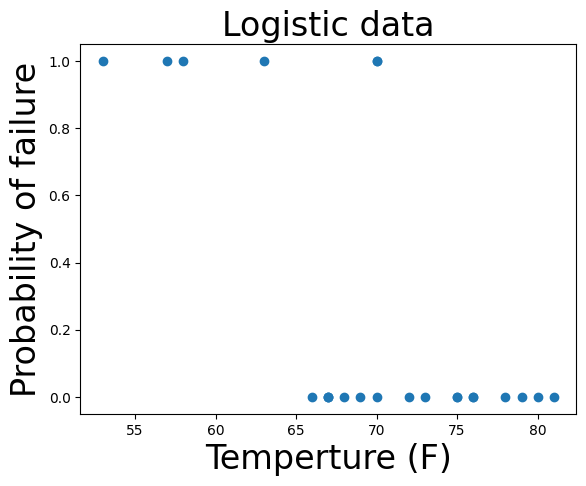

In [121]:
plt.figure()
plt.scatter(data_for_logistic2['temp'], data_for_logistic2['num_failure'])
plt.xlabel('Temperture (F)', fontsize = 24)
plt.ylabel('Probability of failure', fontsize = 24)
plt.title('Logistic data', fontsize = 24)
plt.show()

### Logistic regression in statsmodels:
This is very similar to the linear model. We add a constant then we insert it to the model. This is done by the function sm.Logit.

In [116]:
X_train = sm.add_constant(data_for_logistic2['temp']) 
y_train = data_for_logistic2['num_failure']
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.307452
         Iterations 8


## Here we present the results. 

In [117]:
summary = result.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            num_failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Sep 2023   Pseudo R-squ.:                  0.4643
Time:                        14:49:50   Log-Likelihood:                -7.0714
converged:                       True   LL-Null:                       -13.201
Covariance Type:            nonrobust   LLR p-value:                 0.0004629
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2216     11.485      2.022      0.043       0.712      45.731
temp          -0.3576      0.170     -2.101      0.036      -0.691      -0.024
==============================================================================
"""

### Analyzing the results
We want to be check if the temparture is statisitcal signifant. 
Thus, we want to see if under P>|z| the value is lower than 0.05. This is called the Wald test.

## Predicting the results

In [72]:
x_preds = np.linspace(33, 88,100)
x_preds = sm.add_constant(x_preds) 
pred_vals =  result.predict(x_preds)

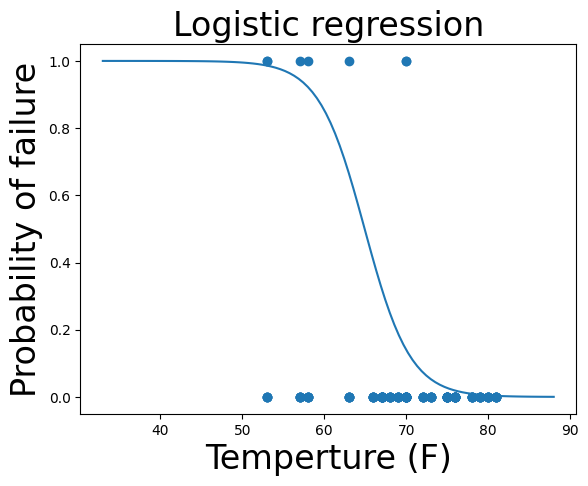

In [120]:
plt.figure()
plt.scatter(data_for_logistic['temp'], data_for_logistic['failure'])
plt.plot(np.linspace(33, 88,100), pred_vals )
plt.xlabel('Temperture (F)', fontsize = 24)
plt.ylabel('Probability of failure', fontsize = 24)
plt.title('Logistic regression', fontsize = 24)
plt.show()